In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_hits = pd.read_pickle('model/data/ga_hits.pkl')
df_hits = df_hits.drop_duplicates()

In [3]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [4]:
df_hits.shape

(15726470, 11)

In [5]:
df_hits.event_action.value_counts(dropna=False)

view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: event_action, Length: 230, dtype: int64

In [6]:
# создаём колонку для целевой переменной со значениями 0 или 1
# 0 - пользователь не совершил целевого действия в рамках сессии
# 1 - пользователь совершил целевое действие

target_actions = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df_hits['target_action'] = df_hits.event_action.apply(lambda x: 1 if x in target_actions else 0)
df_target = df_hits[['session_id', 'target_action']].groupby(['session_id'], as_index=False).max()

In [7]:
df_target.head()

,session_id,target_action
0,1000009318903347362.1632663668.1632663668,0
1,1000010177899156286.1635013443.1635013443,0
2,1000013386240115915.1635402956.1635402956,0
3,1000017303238376207.1623489300.1623489300,0
4,1000020580299877109.1624943350.1624943350,0


In [8]:
df_sessions = pd.read_pickle('model/data/ga_sessions.pkl')
df_sessions = df_sessions.drop_duplicates()

In [9]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [10]:
df_sessions.shape

(1860042, 18)

In [11]:
# вытаскиваем целевую переменную из датафрейма с событиями и объединяем с основным датафреймом по id визита

df_merged = df_sessions.merge(df_target, how='inner', on='session_id')

In [12]:
df_merged.to_csv('model/data/ga_merged.csv', index=False)

In [36]:
df_merged.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0


In [37]:
df_merged.shape

(1732266, 19)

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target_action             int64  
dtypes: float64(1), int64(2), object(16)
memory usage: 251.1+ MB


In [39]:
df_merged.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
count,1732266,1.732266e+06,1732266,1732266,1.732266e+06,1732190,1732266,1536979,1428129,711514,1732266,718302,1385070,15062,1732266,1732266,1732266,1732266,1.732266e+06
unique,1732266,NaN,226,85032,NaN,280,55,406,280,1192,3,13,200,104,4947,55,159,2389,NaN
top,9055434745589932991.1637753792.1637753792,NaN,2021-05-24,13:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow,NaN
freq,1,NaN,39230,58044,NaN,552555,525206,422992,935408,465950,1368679,425520,503533,9018,155140,951573,1682423,750928,NaN
mean,NaN,1.074577e+09,NaN,NaN,2.627835e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.904519e-02
std,NaN,6.201370e+08,NaN,NaN,1.164260e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.679333e-01
min,NaN,2.321640e+02,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,5.378943e+08,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,1.074614e+09,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
75%,NaN,1.612130e+09,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [40]:
# список всех признаков, в которых имеются пропущенные значения, и количество пропусков

missing_values = ((df_merged.isna().sum() / len(df_merged)) * 100).sort_values(ascending=False)
missing_columns = missing_values[missing_values.values > 0].index.tolist()
df_merged[missing_columns].isna().sum()

device_model     1717204
utm_keyword      1020752
device_os        1013964
device_brand      347196
utm_adcontent     304137
utm_campaign      195287
utm_source            76
dtype: int64

In [41]:
df_merged.geo_country.value_counts()

Russia                 1682423
Ukraine                   8455
United States             8141
Belarus                   3432
Kazakhstan                2109
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: geo_country, Length: 159, dtype: int64

In [42]:
# оставим данные только по России

df_merged = df_merged[df_merged['geo_country'] == 'Russia']

In [43]:
# избавляемся от пропусков и удаляем неинформативные фичи

df_merged.utm_medium = df_merged.utm_medium.fillna(str(df_merged.utm_medium.mode()))
df_merged.utm_source = df_merged.utm_source.fillna(str(df_merged.utm_source.mode()))
df_merged.device_brand = df_merged.device_brand.fillna(str(df_merged.device_brand.mode()))

columns_for_drop = ['session_id', 'client_id', 'device_model', 'utm_keyword', 'device_os', 'utm_adcontent', 'utm_campaign', 'device_screen_resolution', 'geo_country']

df_merged = df_merged.drop(columns=columns_for_drop)

In [44]:
df_merged.geo_city.value_counts()

Moscow              750928
Saint Petersburg    278402
(not set)            65755
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Osinovo                  1
Gorodishche              1
Troitsk                  1
Slavyanka                1
Beslan                   1
Name: geo_city, Length: 505, dtype: int64

In [45]:
# в geo_city оставляем 10 самых популярных городов, остальные помещаем в общую категорию без обозначения названий - '(not set)'

most_popular_cities = df_merged.geo_city.value_counts().index.tolist()[0:11]

df_merged['geo_city'] = df_merged.geo_city.apply(lambda x: x if x in most_popular_cities else '(not set)')

In [46]:
df_merged.geo_city.value_counts()

Moscow              750928
(not set)           461693
Saint Petersburg    278402
Yekaterinburg        33555
Krasnodar            30260
Kazan                27689
Samara               23433
Nizhny Novgorod      20782
Ufa                  20283
Novosibirsk          20115
Krasnoyarsk          15283
Name: geo_city, dtype: int64

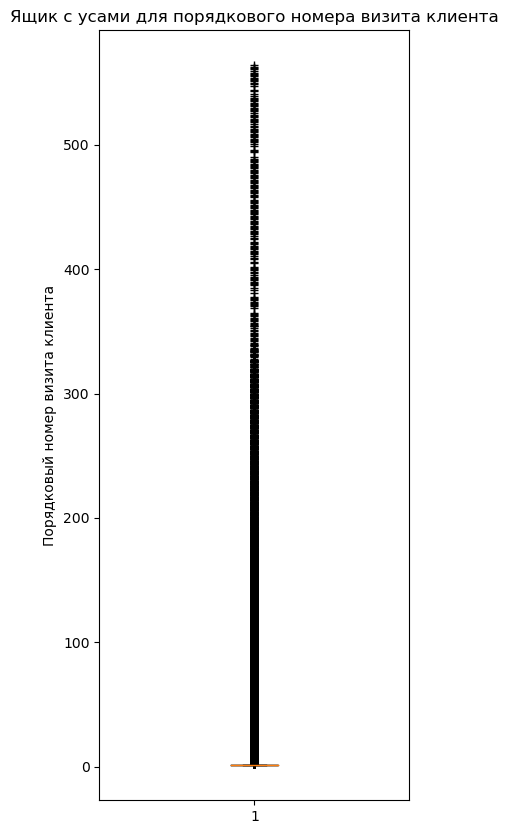

In [47]:
# проверяем номера визита клиента на наличие выбросов

plt.figure(figsize=(4, 10))
plt.boxplot(df_merged.visit_number, sym='+')
plt.ylabel('Порядковый номер визита клиента')
plt.title('Ящик с усами для порядкового номера визита клиента');

In [48]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5*iqr, q75 + 1.5*iqr)
    return boundaries

boundaries = calculate_outliers(df_merged.visit_number)
boundaries

(1.0, 1.0)

In [49]:
# данных, которые выходят за пределы границ, слишком большое количество
# возможно, они не являются выбросами. Пока оставляем значения как есть

df_merged.visit_number.value_counts()

1      1261938
2       206508
3        69990
4        35678
5        20940
        ...   
418          1
419          1
420          1
421          1
564          1
Name: visit_number, Length: 533, dtype: int64

In [50]:
# создаем новые фичи на основе даты и времени визита, после удаляем исходную колонку с датами
# visit_time - час визита
# visit_month - месяц визита
# visit_dayofweek - день недели визита

df_merged['visit_time'] = pd.to_datetime(df_merged['visit_time'], format='%H:%M:%S')
df_merged['visit_time'] = df_merged['visit_time'].dt.hour

df_merged['visit_date'] = pd.to_datetime(df_merged['visit_date'], format='%Y-%m-%d')
df_merged['visit_month'] = df_merged['visit_date'].dt.month
df_merged['visit_dayofweek'] = df_merged['visit_date'].dt.dayofweek

df_merged = df_merged.drop(columns=['visit_date'])

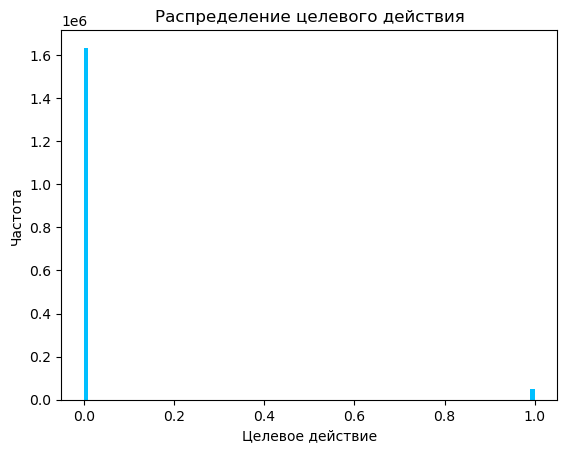

In [58]:
# построим график распределения целевой переменной

plt.figure()
plt.hist(df_merged.target_action, bins=100, color='deepskyblue')
plt.xlabel('Целевое действие')
plt.ylabel('Частота')
plt.title('Распределение целевого действия');

In [59]:
df_merged.target_action.value_counts()

0    1633267
1      49156
Name: target_action, dtype: int64

In [60]:
# выборка таргета слишком несбалансирована
# проводим балансировку датасета

df_1 = df_merged[df_merged['target_action'] == 1]
df_0 = df_merged[df_merged['target_action'] == 0].iloc[:50000]
df_balanced = pd.concat([df_1, df_0], axis=0).sample(frac=1).reset_index(drop=True)

df_balanced.head()

,visit_time,visit_number,utm_source,utm_medium,device_category,device_brand,device_browser,geo_city,target_action,visit_month,visit_dayofweek
0,3,1,BHcvLfOaCWvWTykYqHVe,cpc,mobile,Huawei,YaBrowser,Moscow,0,10,5
1,13,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Samsung,Chrome,(not set),0,12,1
2,15,1,ZpYIoDJMcFzVoPFsHGJL,banner,mobile,Samsung,Chrome,Moscow,1,6,6
3,17,1,fDLlAcSmythWSCVMvqvL,(none),mobile,Apple,Safari,Moscow,0,11,3
4,17,1,MvfHsxITijuriZxsqZqt,cpm,mobile,Xiaomi,Opera,Saint Petersburg,0,9,6


In [61]:
# теперь целевая переменная распределена равномерно

df_balanced.target_action.value_counts()

0    50000
1    49156
Name: target_action, dtype: int64

In [62]:
df_balanced.to_csv('model/data/ga_balanced.csv', index=False)